# TP N°2 : Classification et clustering (k-means)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


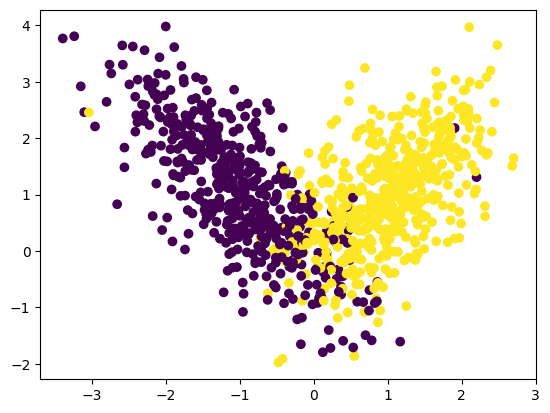

In [3]:
# creer datasets

np.random.seed(0)
x,y = make_classification(n_samples=1000,n_features=5,n_redundant=0,
                          n_clusters_per_class=1,n_classes=2)

plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [5]:
# creer dataframe 

dataset = pd.DataFrame(x)
dataset.columns= ['x1','x2','x3','x4','x5']
dataset['y'] = y

In [6]:
dataset['y'].value_counts()


1    502
0    498
Name: y, dtype: int64

In [8]:
from sklearn.model_selection import cross_validate
from sklearn import tree


classifier = tree.DecisionTreeClassifier()

scores = cross_validate(classifier,x,y,cv=10,
                scoring=['accuracy','precision','recall','f1'])


scores = pd.DataFrame(scores)
scores.mean().round(0)

fit_time          0.0
score_time        0.0
test_accuracy     1.0
test_precision    1.0
test_recall       1.0
test_f1           1.0
dtype: float64

//////////////////////////////////////////////////////////////////////

Exercice 3 :( Jeu de données iris)

In [82]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris = load_iris()

In [97]:
# creerer dataframe 

df = pd.DataFrame(data=np.c_[iris['data'],iris['target']],
                 columns=iris['feature_names']+['target']
                 )

df1 = df.copy()

In [84]:
# Analyser et visualiser les donnees 

df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


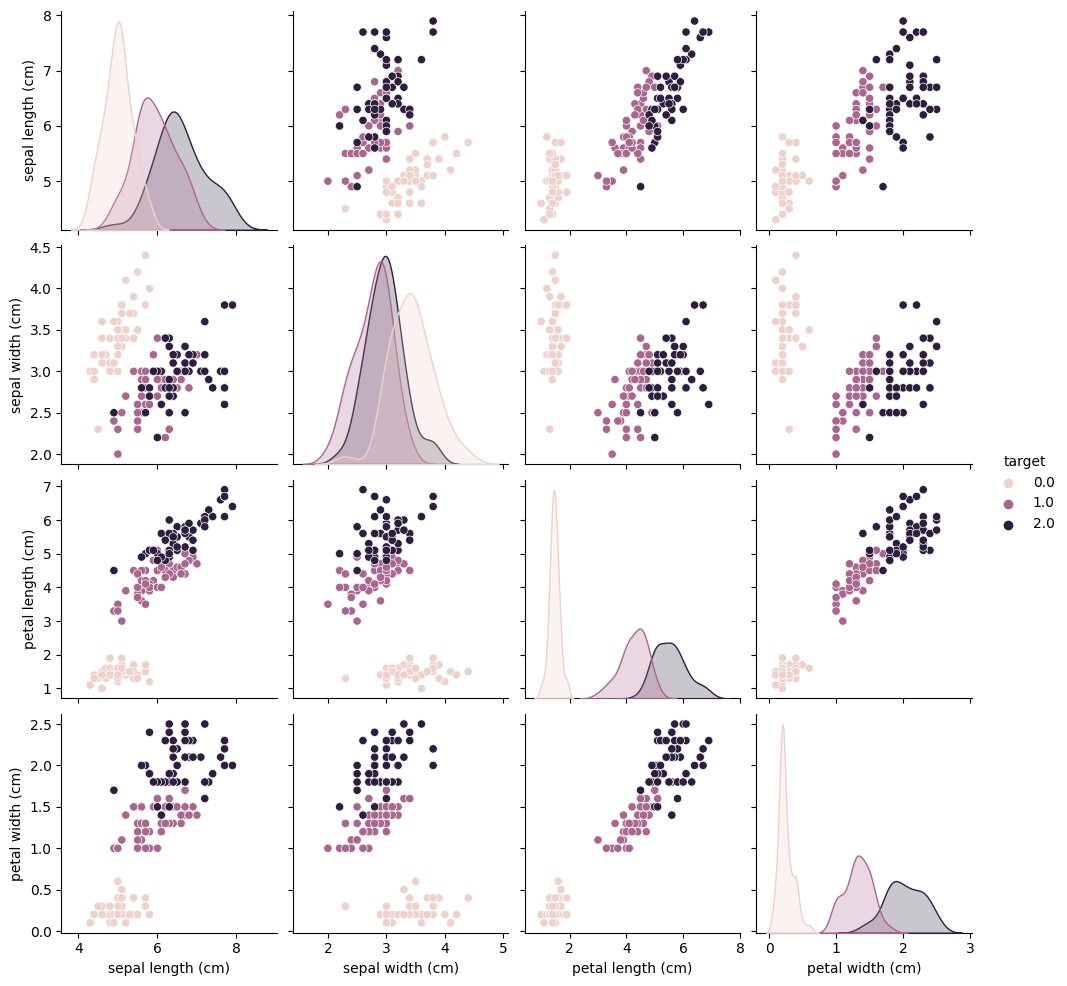

In [85]:
sns.pairplot(df,hue='target')

In [86]:
# creer le modèle

X = X = df.drop(['target'], axis=1)

X = X.to_numpy()[:, (2,3)]
y = df['target']

# Diviser les donnees 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5, random_state=42)


In [87]:
# trainer le modele
from sklearn.tree import DecisionTreeClassifier 

classifier = DecisionTreeClassifier(criterion='gini', random_state=0) 
classifier.fit(X_train,y_train)


DecisionTreeClassifier(random_state=0)

In [88]:
# prediction 
predictions = classifier.predict(X_test)

# calcul accuracy
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score,accuracy_score,f1_score,cohen_kappa_score,precision_score


print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(precision_score (y_test, predictions,average='macro'))



[[29  0  0]
 [ 0 23  0]
 [ 0  4 19]]
0.9466666666666667
0.9506172839506174


In [94]:
from sklearn.metrics import roc_auc_score
predictions = classifier.predict_proba(X_test)
auc_roc = roc_auc_score(y_true=y_test, y_score= predictions,multi_class='ovr')
print(auc_roc)


0.9686454849498327


In [93]:
# Information sur le nouvel iris 
longueur = 2.5 
largeur = 0.75 
# Prédiction de sa classe 
Prediction = classifier.predict([[longueur,largeur]])
print(Prediction)

[0.]


Exercice 4 : Découvrez l’algorithme k-means - Exemple avec le dataset Iris


In [68]:
# importer le dataset 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [69]:
# charget le dataset

iris = load_iris() 
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.columns = [i.split('(')[0].replace(" ", "_")[:-1] for i in df.columns]
X = df.copy()

In [70]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [71]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

C:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [72]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [78]:
l = {i:j for i,j in enumerate(list("abc"))}
labels =  [l[i] for i in kmeans.labels_]
labels[:10]


['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b']

In [56]:
X["cluster"] = labels
X

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,b
1,4.9,3.0,1.4,0.2,b
2,4.7,3.2,1.3,0.2,b
3,4.6,3.1,1.5,0.2,b
4,5.0,3.6,1.4,0.2,b
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,a
146,6.3,2.5,5.0,1.9,c
147,6.5,3.0,5.2,2.0,a
148,6.2,3.4,5.4,2.3,a


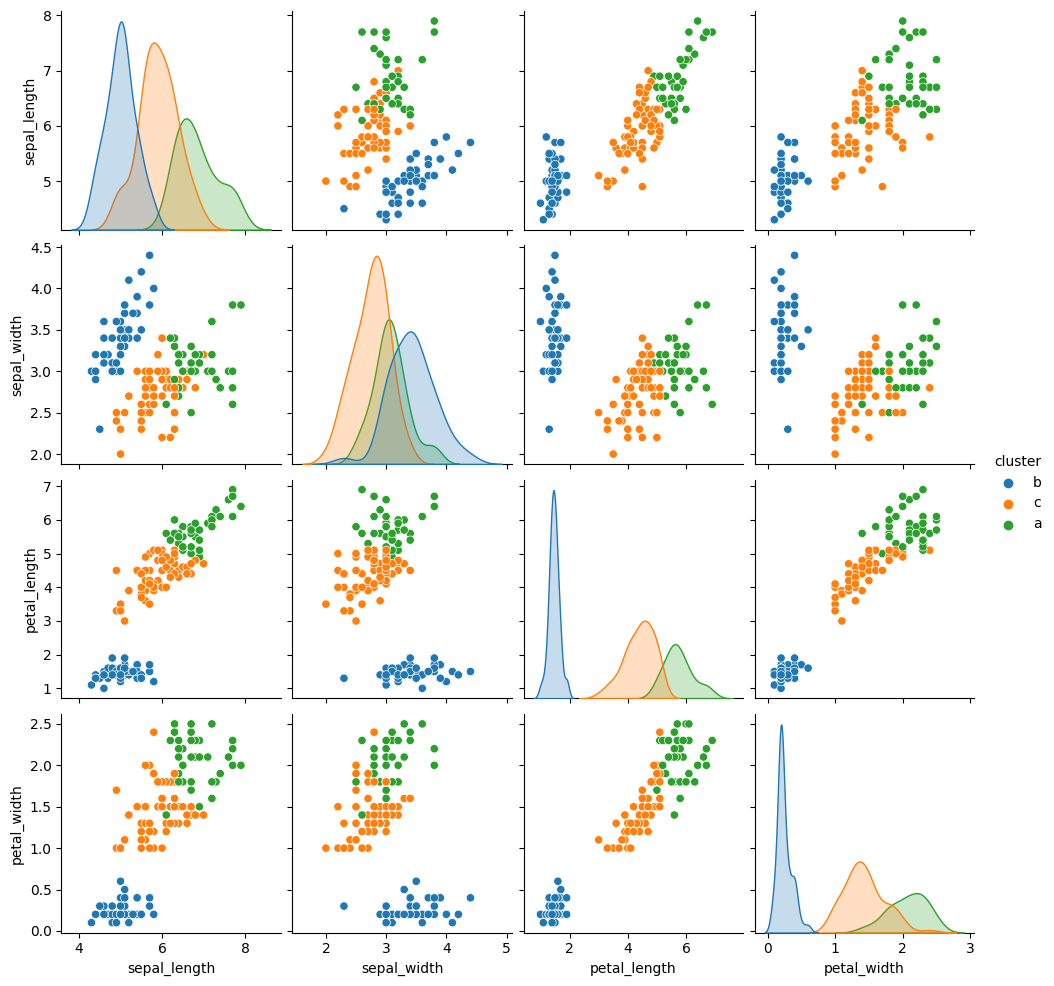

In [57]:
sns.pairplot(X, hue="cluster")

In [99]:
df1['cluster'] = labels

In [103]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0.0,b
1,4.9,3.0,1.4,0.2,0.0,b
2,4.7,3.2,1.3,0.2,0.0,b
3,4.6,3.1,1.5,0.2,0.0,b
4,5.0,3.6,1.4,0.2,0.0,b
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,a
146,6.3,2.5,5.0,1.9,2.0,c
147,6.5,3.0,5.2,2.0,2.0,a
148,6.2,3.4,5.4,2.3,2.0,a


In [104]:
df1.target.value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [105]:
df1.cluster.value_counts()

c    62
b    50
a    38
Name: cluster, dtype: int64